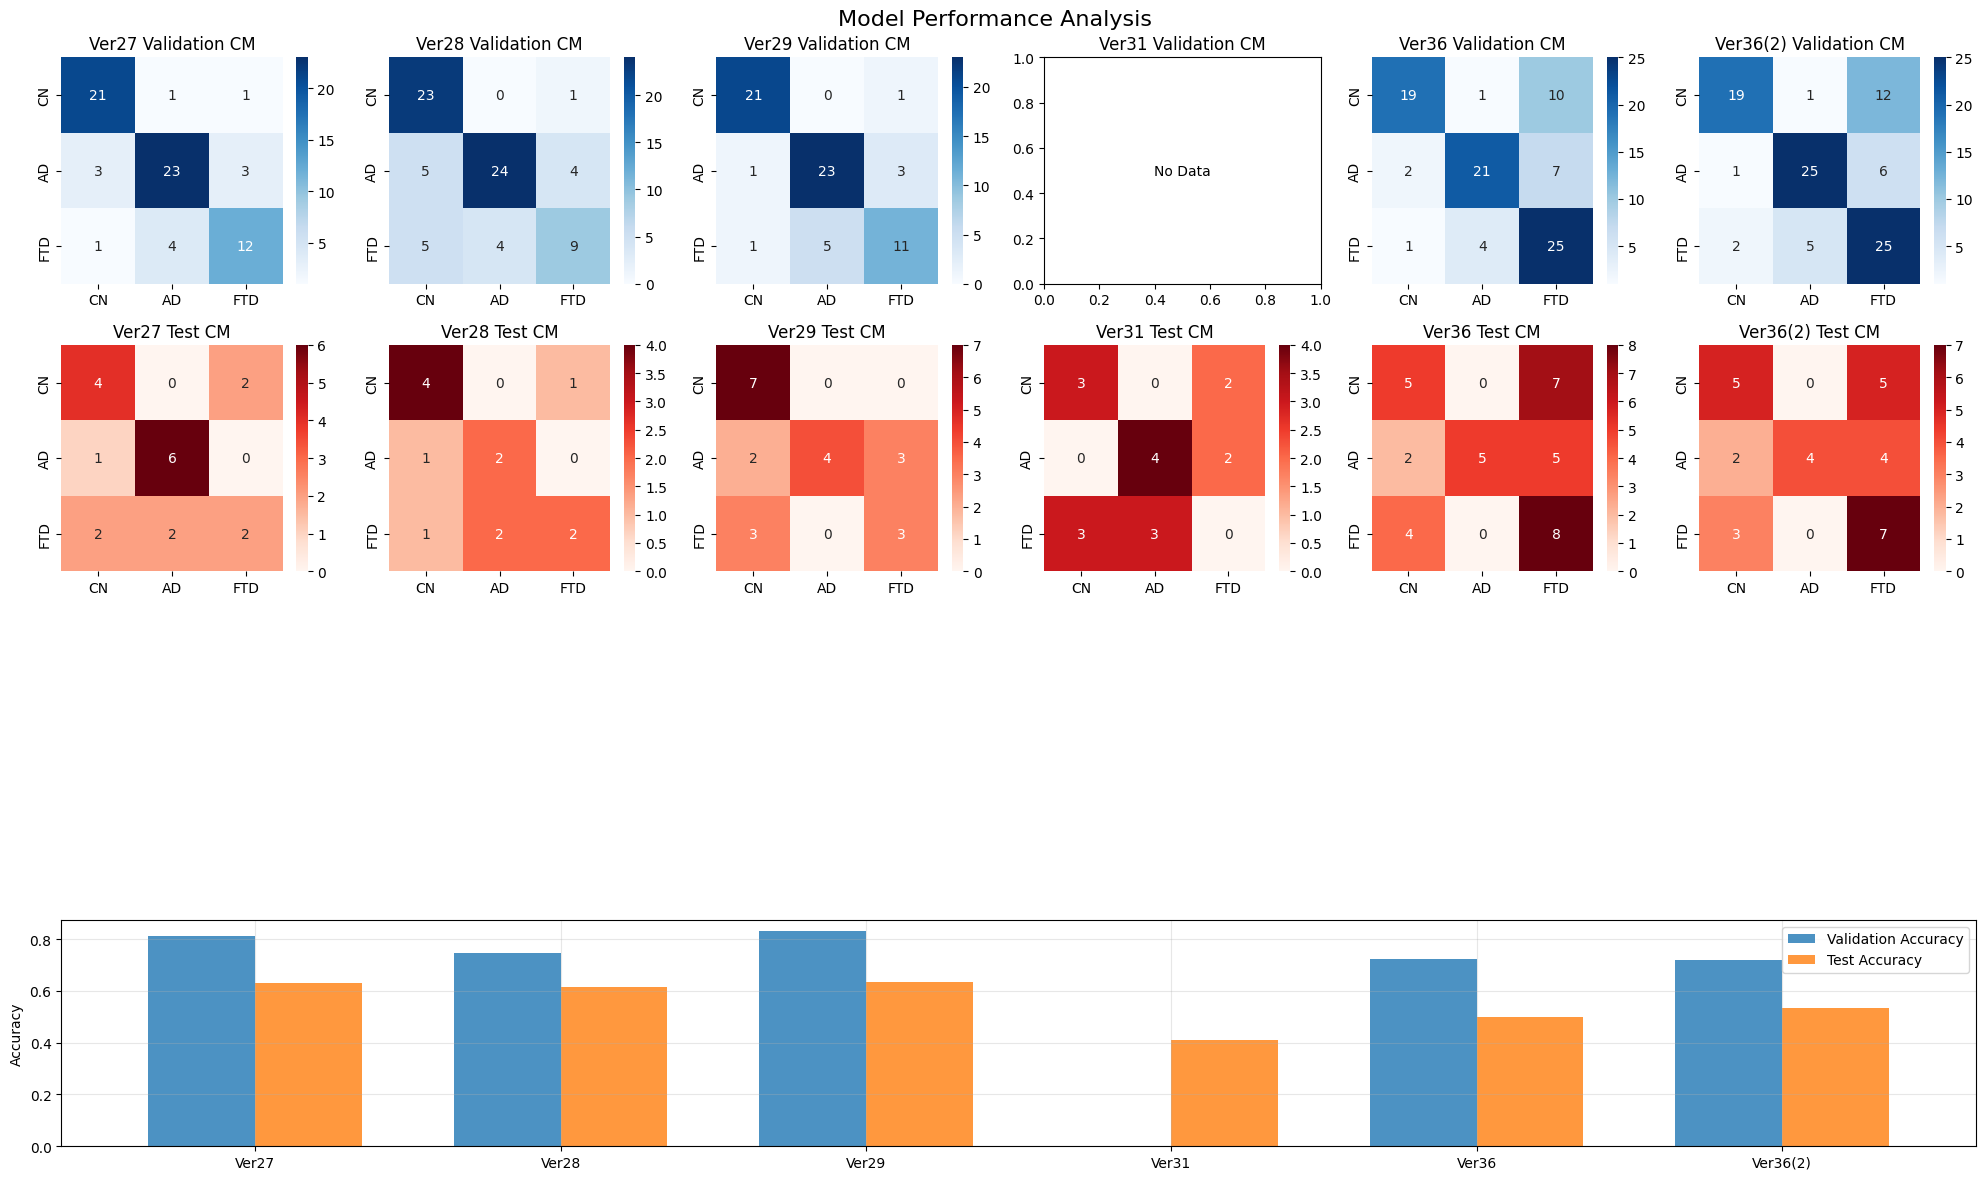

Epoch별 loss/acc 그래프는 제공된 정보에 포함되어 있지 않습니다


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import gridspec

# 데이터 설정
versions = ['Ver27', 'Ver28', 'Ver29', 'Ver31', 'Ver36', 'Ver36(2)']
class_names = ['CN', 'AD', 'FTD']

# Validation CM 데이터
val_cms = [
    np.array([[21, 1, 1], [3, 23, 3], [1, 4, 12]]),
    np.array([[23, 0, 1], [5, 24, 4], [5, 4, 9]]),
    np.array([[21, 0, 1], [1, 23, 3], [1, 5, 11]]),
    None,  # Ver31 없음
    np.array([[19, 1, 10], [2, 21, 7], [1, 4, 25]]),
    np.array([[19, 1, 12], [1, 25, 6], [2, 5, 25]])
]

# Test CM 데이터
test_cms = [
    np.array([[4, 0, 2], [1, 6, 0], [2, 2, 2]]),
    np.array([[4, 0, 1], [1, 2, 0], [1, 2, 2]]),
    np.array([[7, 0, 0], [2, 4, 3], [3, 0, 3]]),
    np.array([[3, 0, 2], [0, 4, 2], [3, 3, 0]]),
    np.array([[5, 0, 7], [2, 5, 5], [4, 0, 8]]),
    np.array([[5, 0, 5], [2, 4, 4], [3, 0, 7]])
]

# 성능 지표
val_metrics = [
    (0.812, 0.8031), (0.747, 0.7188), (0.833, 0.8191),
    (None, None), (0.722, 0.7251), (0.719, 0.7213)
]
test_metrics = [
    (0.632, 0.6051), (0.615, 0.5996), (0.636, 0.6174),
    (0.4118, 0.3869), (0.500, 0.5077), (0.533, 0.5366)
]

# Confusion Matrix 플롯
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Model Performance Analysis', fontsize=16)

for i, version in enumerate(versions):
    # Validation CM
    ax1 = plt.subplot(4, 6, i+1)
    if val_cms[i] is not None:
        sns.heatmap(val_cms[i], annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names)
        plt.title(f'{version} Validation CM')
    else:
        plt.text(0.5, 0.5, 'No Data', ha='center', va='center')
        plt.title(f'{version} Validation CM')

    # Test CM
    ax2 = plt.subplot(4, 6, i+7)
    sns.heatmap(test_cms[i], annot=True, fmt='d', cmap='Reds',
               xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{version} Test CM')

# 성능 비교 플롯
ax3 = plt.subplot(4, 1, 4)
x = np.arange(len(versions))
width = 0.35

val_acc = [m[0] if m[0] else 0 for m in val_metrics]
test_acc = [m[0] for m in test_metrics]

plt.bar(x - width/2, val_acc, width, label='Validation Accuracy', alpha=0.8)
plt.bar(x + width/2, test_acc, width, label='Test Accuracy', alpha=0.8)
plt.xticks(x, versions)
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 주의: Epoch별 loss/acc 그래프는 제공된 데이터에 없어 생성 불가
print("Epoch별 loss/acc 그래프는 제공된 정보에 포함되어 있지 않습니다")